<a href="https://colab.research.google.com/github/devkegovind/Data-Analytics-Laboratory/blob/main/Linear_Regression_on_3D_Printing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'><b>TO PERFORM LINEAR REGRESSION STUDY ON THE 3D PRINTING DATASET</b></h1>

<h4 align='justify'><b>Aim: To Perform Linear Regression study on the 3D printing dataset.</b></h4>
<h4 align='justify'><b>Prerequisites</b>: Automobile data, Jupyter Notebook / Google Colab</h4>
<h4 align='justify'>This dataset comes from research by TR/Selcuk University Mechanical Engineering department.The aim of the study is to determine how much of the adjustment parameters in 3d printers affect the print quality, accuracy and strenght. Where there are nine setting parameters and three measured output parameters.</h4>

<h4 align='justify'><b>Content</b></h4>

<h4 align='justify'>Setting Parameters:</h4>

- Layer Height (mm)
- Wall Thickness (mm)
- Infill Density (%)
- Infill Pattern ()
- Nozzle Temperature (Cº)
- Bed Temperature (Cº)
- Print Speed (mm/s)
- Material ()
- Fan Speed (%)

<h4 align='justify'><b>Output Parameters: (Measured)</b></h4>

- Roughness (µm)
- Tension (ultimate) Strenght (MPa)
- Elongation (%)

<h4 align='justify'>In this notebook, we will perform simple linear regression analysis of the 3D printing 
dataset and study the various relationships existing between the target variables AKA 
labels and the predictor varibale AKA features.</h4>

- The dataset contains 12 columns.
- The first 9 columns i.e from layer_height to fan_speed are features.
- The last 3 columns i.i from roughness to elongation are labels. So, we will 
be predicting these three based on the 9 features.
- The various units of the nine features are as follows:

1. Layer Height in mm
2. Wall Thickness in mm
3. Infill Density in %
4. Infill Pattern in either Grid or Honeycomb
5. Nozzle Temperature in Degree C
6. Bed Temperature in degree C
7. Print speed in mm/s
8. Material in either abs or pla
9. Fan Speed in %

<h4 align='justify'>The units of the labels are as follows</h4>

1. Roughness in micro metre
2. Tension Strength in MPa
3. Elongation in %

<h4 align='justify'>Pictures of Infill patterns and Filament materials Basic information</h4>

- The dataset contains 50 rows of data.
- The columns infill_pattern and material consists of categorical entries (infill_pattern 
= grid or honeycomb and material = abs or pla) instead of numerical entries.
- In the Machine Learning World this is relatively a very small dataset interms of 
observations. Still we can fit a good regression model out of it and study them

<h4><b>Import Library</b></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To enable matplot visualization
%matplotlib inline 

<h4><b>Import Dataset</b></h4>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/DAL/data.xlsx')

In [4]:
df

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.1
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.3
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.5
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.4
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7


In [5]:
df.shape

(50, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [7]:
df.isna().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
layer_height,50.0,0.106,0.064397,0.02,0.06,0.10,0.150,0.2
wall_thickness,50.0,5.220,2.922747,1.00,3.00,5.00,7.000,10.0
infill_density,50.0,53.400,25.363480,10.00,40.00,50.00,80.000,90.0
nozzle_temperature,50.0,221.500,14.820353,200.00,210.00,220.00,230.000,250.0
bed_temperature,50.0,70.000,7.142857,60.00,65.00,70.00,75.000,80.0
print_speed,50.0,64.000,29.692300,40.00,40.00,60.00,60.000,120.0
fan_speed,50.0,50.000,35.714286,0.00,25.00,50.00,75.000,100.0
roughness,50.0,170.580,99.034129,21.00,92.00,165.50,239.250,368.0
tension_strenght,50.0,20.080,8.925634,4.00,12.00,19.00,27.000,37.0
elongation,50.0,1.672,0.788188,0.40,1.10,1.55,2.175,3.3


In [9]:
col = df.select_dtypes(exclude='object').columns

In [10]:
col

Index(['layer_height', 'wall_thickness', 'infill_density',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed',
       'roughness', 'tension_strenght', 'elongation'],
      dtype='object')

<h4><b>Univariate Analysis</b></h4>

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/hist.py:464: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


<Figure size 1080x720 with 0 Axes>

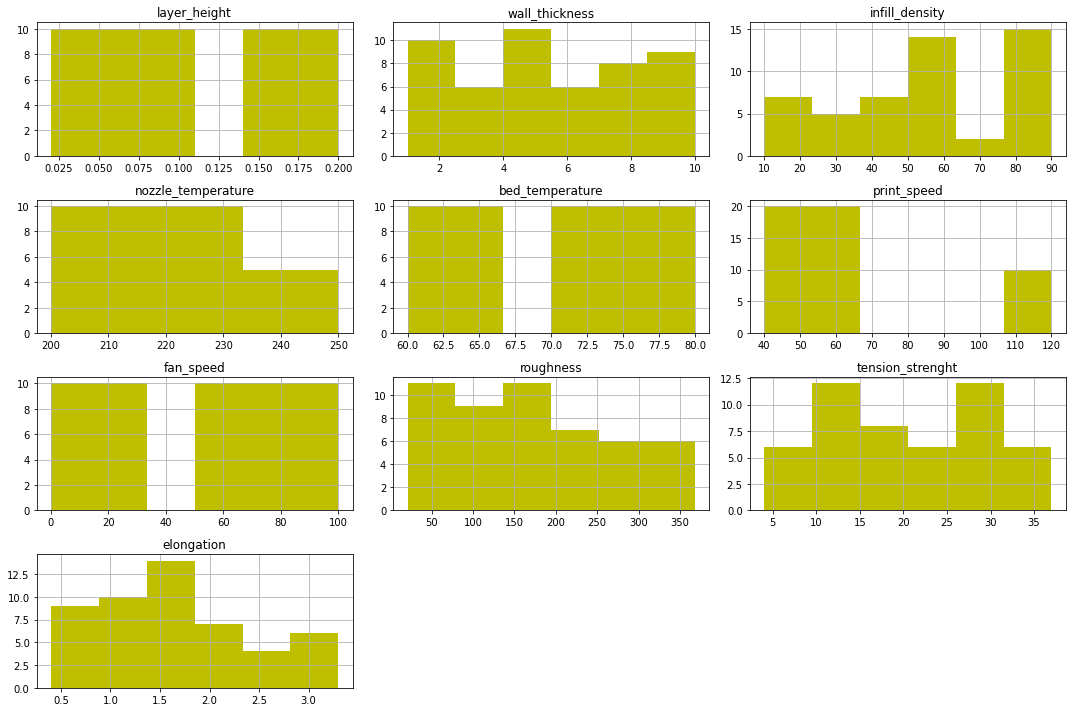

In [11]:
plt.figure(figsize=(15, 10))
df[col].hist(figsize=(15,10),bins=6,color='Y')
plt.tight_layout()
plt.show()

<h4><b>Findings</b></h4>

- Most of the AKA has layer_weight is in range 0.025 to 0.2
- Most of the AKA has wall_thickness is in range 1 to 5
- Most of the AKA has infill_density is in range 50 to 90
- Most of the AKA has nozzle_temperature is in range 200 to 230
- Most of the AKA has bed_temperature is in range 70 to 80
- Most of the AKA has print_speed is in range 40 to 65
- Most of the AKA has fan_speed is in range 50 to 100
- Most of the AKA has roughness is in range 25 to 250
- Most of the AKA has tension_strength is in range 10 to 20
- Most of the AKA has elongation is in range 0.4 to 1.8



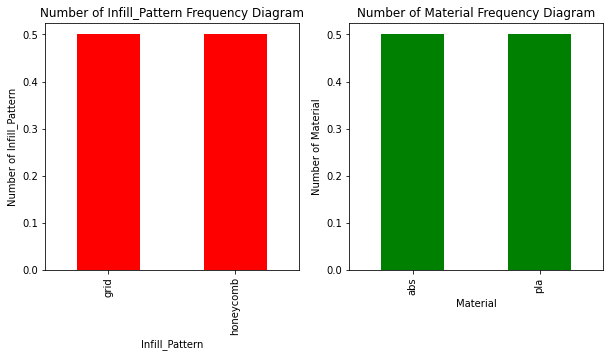

In [12]:
plt.figure(1)
plt.subplot(221)
df['infill_pattern'].value_counts(normalize=True).plot(figsize=(10,10), kind='bar', color='red')
plt.title("Number of Infill_Pattern Frequency Diagram")
plt.xlabel("Infill_Pattern")
plt.ylabel("Number of Infill_Pattern")


plt.subplot(222)
df['material'].value_counts(normalize=True).plot(figsize=(10,10), kind='bar', color='green')
plt.title("Number of Material Frequency Diagram")
plt.xlabel("Material")
plt.ylabel("Number of Material")
plt.show()

<h4><b>Findings</b></h4>

- Infill_Pattern have 50% of grid as well as honeycomb pattern.
- Material have 50% of abs as well as pla.

<h4><b>Bivariate Analysis</b></h4>

- Roughness in micro metre

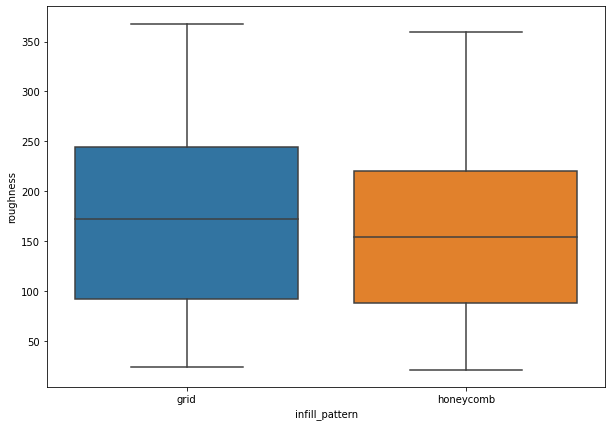

In [13]:
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.boxplot(x = 'infill_pattern', y='roughness', data = df)

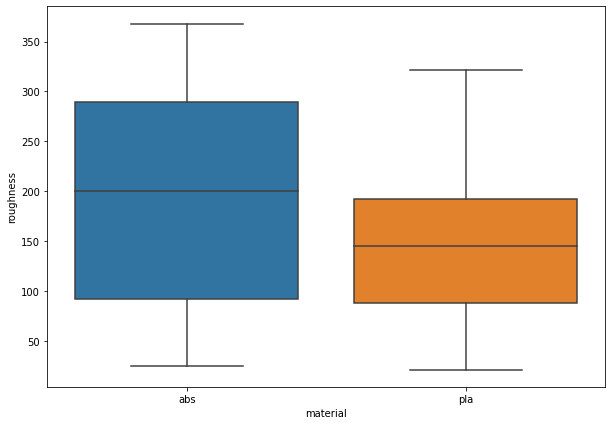

In [14]:
plt.rcParams['figure.figsize'] = (10, 7)
ax = sns.boxplot(x = 'material', y='roughness', data = df)

(0.0, 385.35)

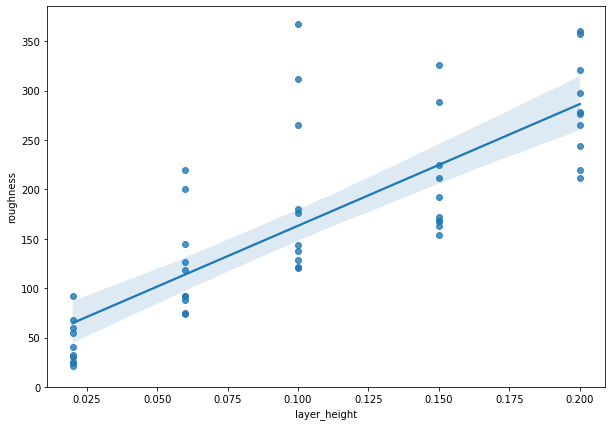

In [15]:
sns.regplot(x='layer_height', y='roughness', data = df)
plt.ylim(0,)

In [16]:
df[['layer_height', 'roughness']].corr()

,layer_height,roughness
layer_height,1.000000,0.801341
roughness,0.801341,1.000000


(0.0, 385.35)

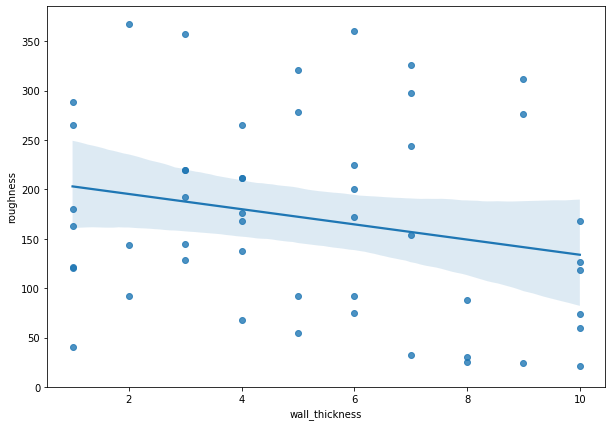

In [17]:
sns.regplot(x='wall_thickness', y='roughness', data = df)
plt.ylim(0,)

In [18]:
df[['wall_thickness', 'roughness']].corr()

,wall_thickness,roughness
wall_thickness,1.000000,-0.226987
roughness,-0.226987,1.000000


(0.0, 385.35)

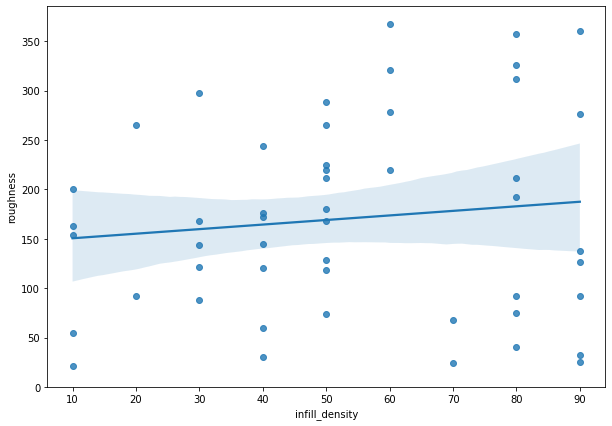

In [19]:
sns.regplot(x='infill_density', y='roughness', data = df)
plt.ylim(0,)

In [20]:
df[['infill_density', 'roughness']].corr()

,infill_density,roughness
infill_density,1.000000,0.118389
roughness,0.118389,1.000000


(0.0, 385.35)

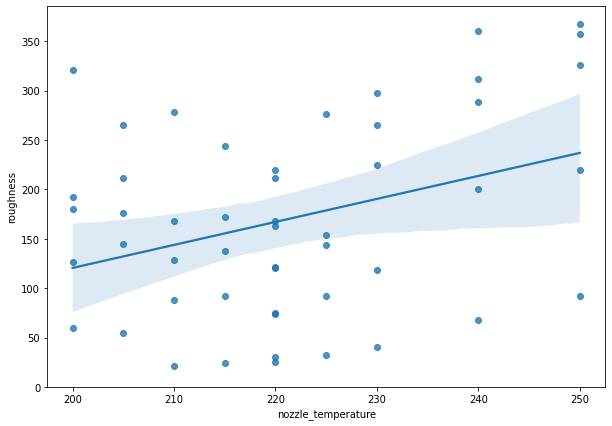

In [22]:
sns.regplot(x='nozzle_temperature', y='roughness', data = df)
plt.ylim(0,)

In [23]:
df[['nozzle_temperature', 'roughness']].corr()

,nozzle_temperature,roughness
nozzle_temperature,1.000000,0.348611
roughness,0.348611,1.000000


(0.0, 385.35)

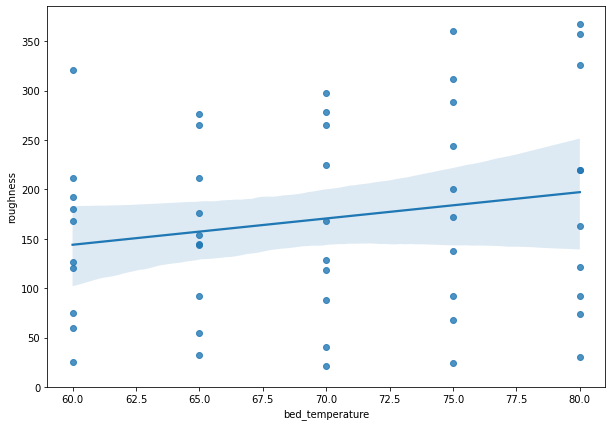

In [24]:
sns.regplot(x='bed_temperature', y='roughness', data = df)
plt.ylim(0,)

In [25]:
df[['bed_temperature', 'roughness']].corr()

,bed_temperature,roughness
bed_temperature,1.000000,0.192142
roughness,0.192142,1.000000


(0.0, 385.35)

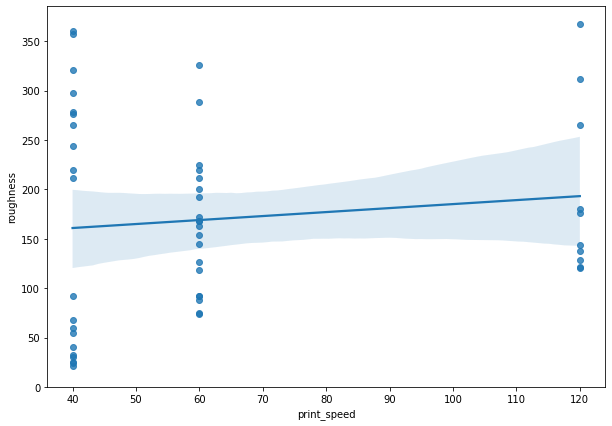

In [26]:
sns.regplot(x='print_speed', y='roughness', data = df)
plt.ylim(0,)

In [27]:
df[['print_speed', 'roughness']].corr()

,print_speed,roughness
print_speed,1.000000,0.121066
roughness,0.121066,1.000000


(0.0, 385.35)

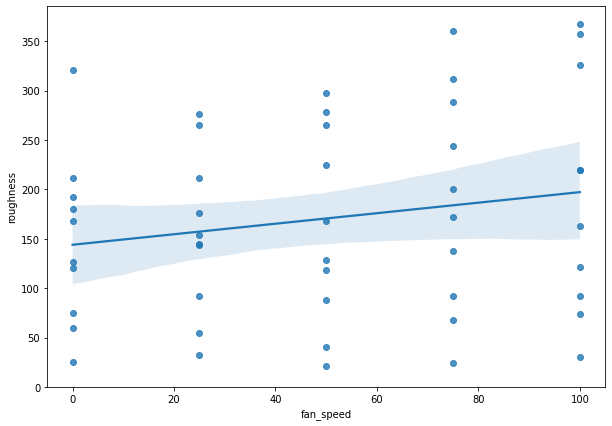

In [28]:
sns.regplot(x='fan_speed', y='roughness', data = df)
plt.ylim(0,)

In [29]:
df[['fan_speed', 'roughness']].corr()

,fan_speed,roughness
fan_speed,1.000000,0.192142
roughness,0.192142,1.000000


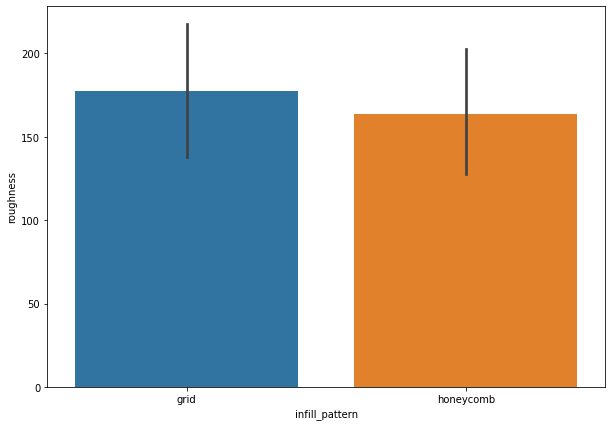

In [30]:
sns.barplot(x='infill_pattern', y = 'roughness', data = df)

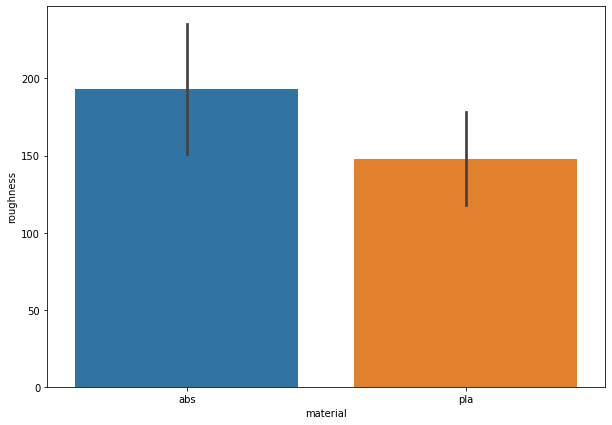

In [31]:
sns.barplot(x='material', y = 'roughness', data = df)

In [32]:
df1 = df.copy()

<h4><b>Replace Object into Numbers</b></h4> 

In [33]:
df['infill_pattern'].replace(['grid', 'honeycomb'], [0, 1], inplace = True)
df['material'].replace(['abs', 'pla'], [0, 1], inplace = True)

In [34]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


<h4><b>Correlation Heatmap of the 3D Printing Dataset</b></h4>

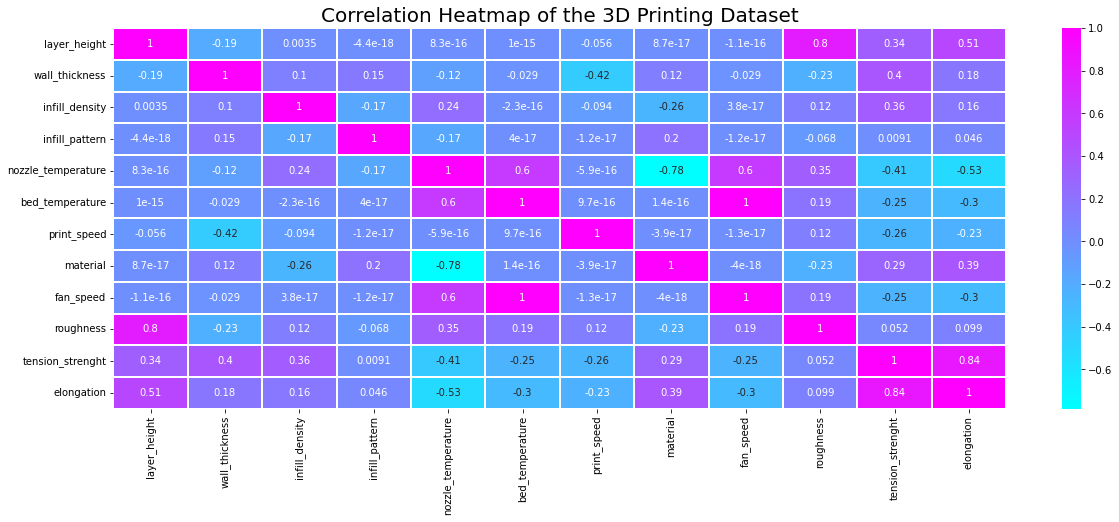

In [35]:
fig, ax = plt.subplots(figsize = (20, 7))
title = "Correlation Heatmap of the 3D Printing Dataset"
plt.title(title, fontsize = 20)
ttl = ax.title
sns.heatmap(df.corr(), cbar = True, cmap = 'cool', annot = True, linewidths = 1, ax = ax)
plt.show()

<h4><b>Defining Features and Labels</b></h4> 

In [36]:
X = df.drop(['roughness','tension_strenght','elongation'], axis = 1)
y = df['roughness']

In [37]:
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [38]:
y.head()

0    25
1    32
2    40
3    68
4    92
Name: roughness, dtype: int64

<h4><b>Importing statsmodels libraty</b></h4> 

In [39]:
import statsmodels.api as sm

In [40]:
def linear_Regression(x, y):
  x = sm.add_constant(x)
  # defining the model, fitting the model and printing the result
  multiple_model = sm.OLS(y, x).fit()
  print(multiple_model.summary())

In [41]:
# calling the function
linear_Regression(X, y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     35.95
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           3.83e-16
Time:                        08:09:16   Log-Likelihood:                -248.19
No. Observations:                  50   AIC:                             514.4
Df Residuals:                      41   BIC:                             531.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9534      0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
df[['infill_pattern', 'roughness']].corr()

,infill_pattern,roughness
infill_pattern,1.00000,-0.06834
roughness,-0.06834,1.00000


In [43]:
X = X.drop(['wall_thickness', 'infill_density', 'infill_pattern'], axis = 1)

In [44]:
X.head()

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,220,60,40,0,0
1,0.02,225,65,40,0,25
2,0.02,230,70,40,0,50
3,0.02,240,75,40,0,75
4,0.02,250,80,40,0,100


In [45]:
X.shape

(50, 6)

In [46]:
linear_Regression(X, y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     59.78
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.67e-18
Time:                        08:09:16   Log-Likelihood:                -248.88
No. Observations:                  50   AIC:                             509.8
Df Residuals:                      44   BIC:                             521.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9307      0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h4 align='justify'><b>Predicting Tension Strength based on Features</b></h4>

In [66]:
df1

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.1
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.3
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.5
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.4
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7


<h4 align='justify'><b>Bivariant Analysis</b></h4>

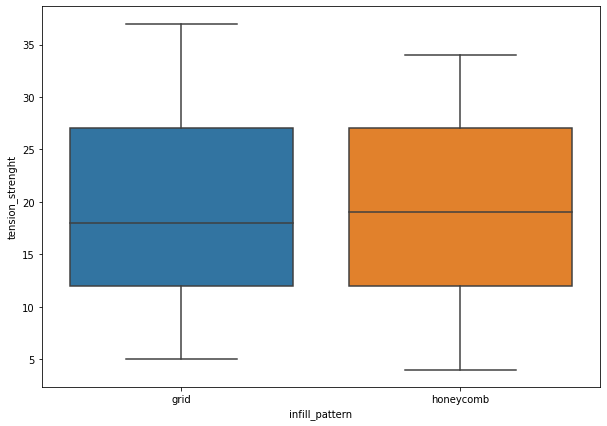

In [67]:
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.boxplot(x = 'infill_pattern', y='tension_strenght', data = df1)

<h4><b>Finding</b></h4>

- In AKA, grid and honeycomb infill_pattern have same tensile strength.

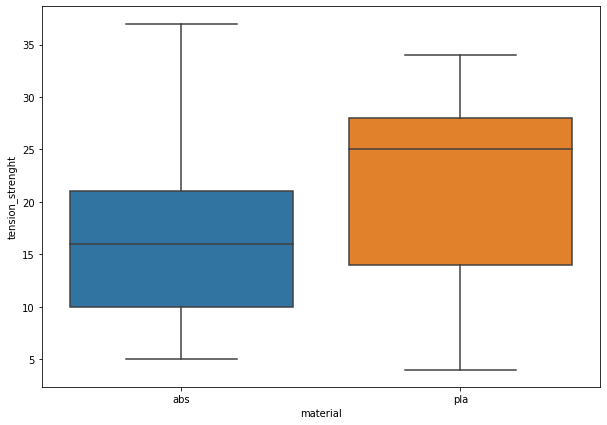

In [68]:
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.boxplot(x = 'material', y='tension_strenght', data = df1)

<h4><b>Finding</b></h4>

- In AKA, abs material have less tensile strength as compair to pla material.

(0.0, 38.65)

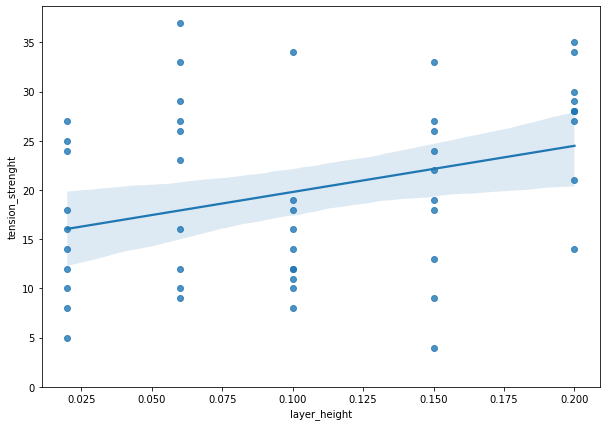

In [69]:
sns.regplot(x='layer_height', y='tension_strenght', data = df1)
plt.ylim(0,)

In [70]:
df1[['layer_height', 'tension_strenght']].corr()

,layer_height,tension_strenght
layer_height,1.00000,0.33823
tension_strenght,0.33823,1.00000


In [71]:
df1.columns

Index(['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'material',
       'fan_speed', 'roughness', 'tension_strenght', 'elongation'],
      dtype='object')

(0.0, 38.65)

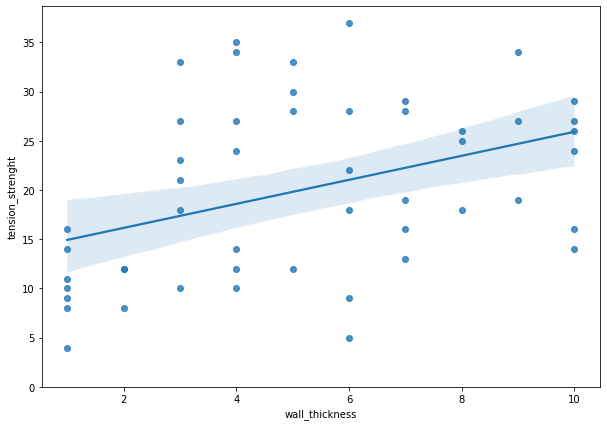

In [72]:
sns.regplot(x='wall_thickness', y='tension_strenght', data = df1)
plt.ylim(0,)

In [73]:
df1[['wall_thickness', 'tension_strenght']].corr()

,wall_thickness,tension_strenght
wall_thickness,1.000000,0.399849
tension_strenght,0.399849,1.000000


(0.0, 38.65)

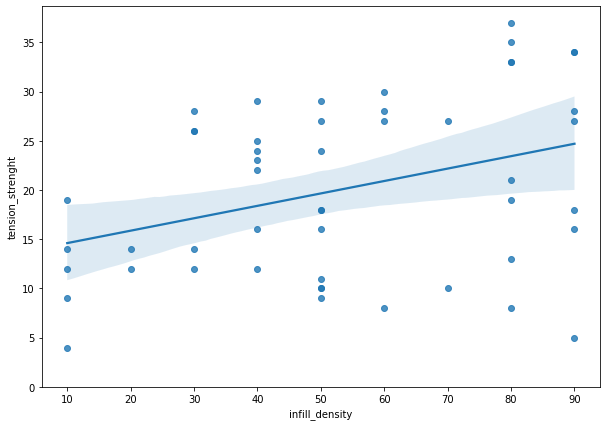

In [74]:
sns.regplot(x='infill_density', y='tension_strenght', data = df1)
plt.ylim(0,)

In [75]:
df1[['infill_density', 'tension_strenght']].corr()

,infill_density,tension_strenght
infill_density,1.000000,0.358464
tension_strenght,0.358464,1.000000


(0.0, 38.65)

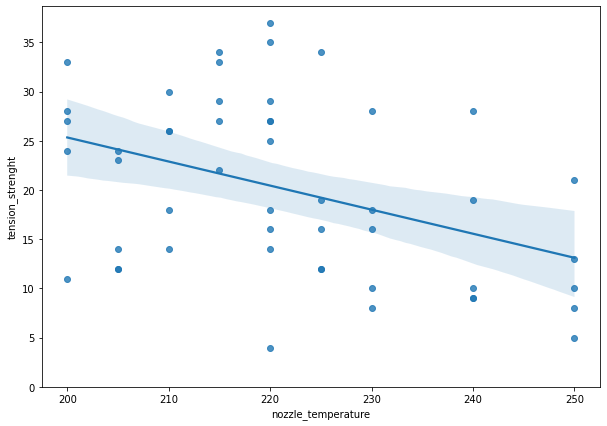

In [79]:
sns.regplot(x='nozzle_temperature', y='tension_strenght', data = df1)
plt.ylim(0,)

In [80]:
df1[['nozzle_temperature', 'tension_strenght']].corr()

,nozzle_temperature,tension_strenght
nozzle_temperature,1.000000,-0.405908
tension_strenght,-0.405908,1.000000


(0.0, 38.65)

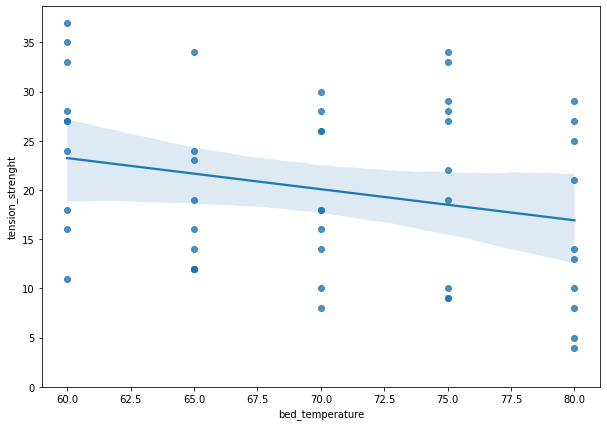

In [81]:
sns.regplot(x='bed_temperature', y='tension_strenght', data = df1)
plt.ylim(0,)

In [82]:
df1[['bed_temperature', 'tension_strenght']].corr()

,bed_temperature,tension_strenght
bed_temperature,1.000000,-0.252883
tension_strenght,-0.252883,1.000000


(0.0, 38.65)

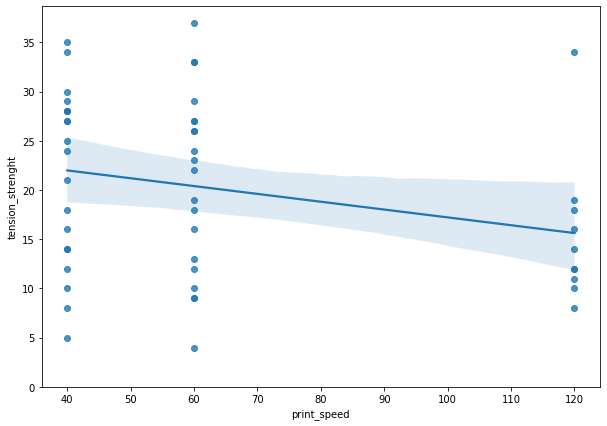

In [83]:
sns.regplot(x='print_speed', y='tension_strenght', data = df1)
plt.ylim(0,)

In [84]:
df1[['print_speed', 'tension_strenght']].corr()

,print_speed,tension_strenght
print_speed,1.00000,-0.26459
tension_strenght,-0.26459,1.00000


(0.0, 38.65)

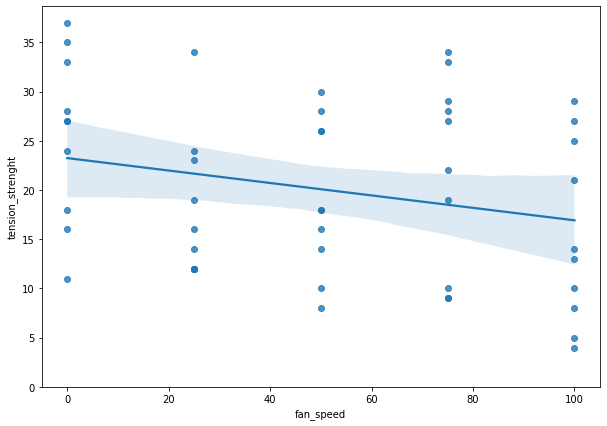

In [85]:
sns.regplot(x='fan_speed', y='tension_strenght', data = df1)
plt.ylim(0,)

In [86]:
df1[['fan_speed', 'tension_strenght']].corr()

,fan_speed,tension_strenght
fan_speed,1.000000,-0.252883
tension_strenght,-0.252883,1.000000


In [87]:
df2 = df1.copy()

<h4 align='justify'><b>Convert Object into integer</b></h4>

In [88]:
df1['infill_pattern'].replace(['grid', 'honeycomb'], [0, 1], inplace = True)
df1['material'].replace(['abs', 'pla'], [0, 1], inplace = True)

In [89]:
df1.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


<h4><b>Correlation Heatmap of the 3D Printing Dataset</b></h4>

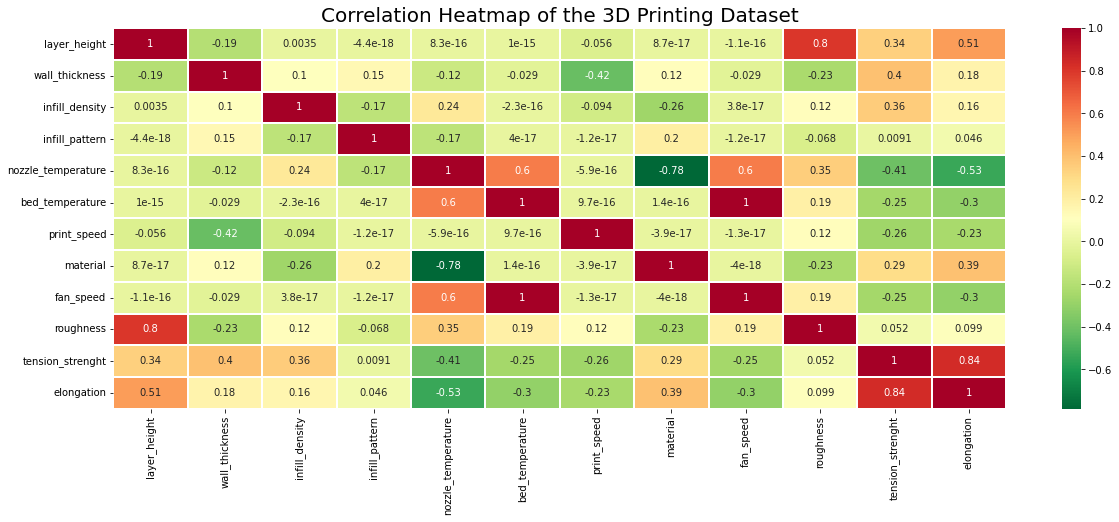

In [96]:
fig, ax = plt.subplots(figsize = (20, 7))
title = "Correlation Heatmap of the 3D Printing Dataset"
plt.title(title, fontsize = 20)
ttl = ax.title
sns.heatmap(df1.corr(), cbar = True, cmap = 'RdYlGn_r', annot = True, linewidths = 1, ax = ax)
plt.show()

<h4><b>Defining Features and Labels</b></h4>

In [97]:
X1 = df1.drop(['roughness','tension_strenght','elongation'], axis = 1)
y1 = df1['tension_strenght']

In [98]:
X1.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [99]:
y1.head()

0    18
1    16
2     8
3    10
4     5
Name: tension_strenght, dtype: int64

<h4><b>Importing Models</b></h4>

In [100]:
import statsmodels.api as sm

# let's define a function for the multiple regression

def linear_Regression1(x, y):
  x = sm.add_constant(x)
  # defining the model, fitting the model and printing the results
  multiple_model1 = sm.OLS(y, x).fit()
  print(multiple_model1.summary())

In [101]:
# call the function
linear_Regression1(X1, y1)

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     10.55
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           6.91e-08
Time:                        08:34:01   Log-Likelihood:                -151.94
No. Observations:                  50   AIC:                             321.9
Df Residuals:                      41   BIC:                             339.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0663      0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [103]:
df1[['infill_pattern', 'tension_strenght']].corr()

,infill_pattern,tension_strenght
infill_pattern,1.000000,0.009054
tension_strenght,0.009054,1.000000


In [104]:
df1[['material', 'tension_strenght']].corr()

,material,tension_strenght
material,1.000000,0.289726
tension_strenght,0.289726,1.000000


In [102]:
X1 = X1.drop(['infill_pattern', 'print_speed', 'material'], axis = 1)
X1.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,fan_speed
0,0.02,8,90,220,60,0
1,0.02,7,90,225,65,25
2,0.02,1,80,230,70,50
3,0.02,4,70,240,75,75
4,0.02,6,90,250,80,100


In [105]:
linear_Regression1(X1, y1)

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     15.27
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.07e-08
Time:                        08:40:24   Log-Likelihood:                -154.73
No. Observations:                  50   AIC:                             321.5
Df Residuals:                      44   BIC:                             332.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0191      0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h4 align='justify'><b>Predicting Elogation based on Features</b></h4>

In [106]:
df2

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.1
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.3
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.5
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.4
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7


In [108]:
df2.shape

(50, 12)

In [107]:
df2.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


<h4><b>Data Cleaning</b></h4>

In [110]:
df2.isna().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

<h4><b>Summary Statistics of Variable</b></h4>

In [111]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
layer_height,50.0,0.106,0.064397,0.02,0.06,0.10,0.150,0.2
wall_thickness,50.0,5.220,2.922747,1.00,3.00,5.00,7.000,10.0
infill_density,50.0,53.400,25.363480,10.00,40.00,50.00,80.000,90.0
nozzle_temperature,50.0,221.500,14.820353,200.00,210.00,220.00,230.000,250.0
bed_temperature,50.0,70.000,7.142857,60.00,65.00,70.00,75.000,80.0
print_speed,50.0,64.000,29.692300,40.00,40.00,60.00,60.000,120.0
fan_speed,50.0,50.000,35.714286,0.00,25.00,50.00,75.000,100.0
roughness,50.0,170.580,99.034129,21.00,92.00,165.50,239.250,368.0
tension_strenght,50.0,20.080,8.925634,4.00,12.00,19.00,27.000,37.0
elongation,50.0,1.672,0.788188,0.40,1.10,1.55,2.175,3.3


<h4><b>Bivariant Analysis</b></h4>

- Elongation Analysis

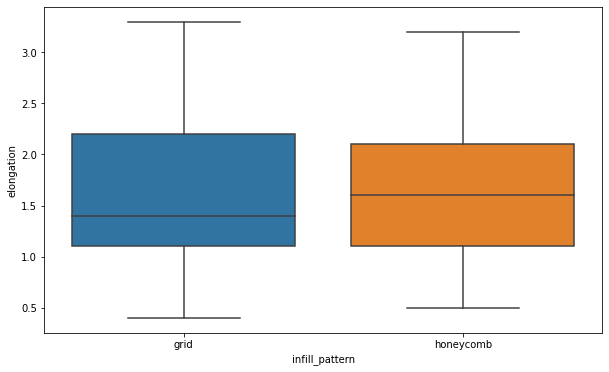

In [113]:
plt.rcParams['figure.figsize'] = (10,6)
ax = sns.boxplot(x = 'infill_pattern', y ='elongation', data = df2)

<h4><b>Findings</b></h4>

- Infill_pattern have same elongation in grid and honeycomb.

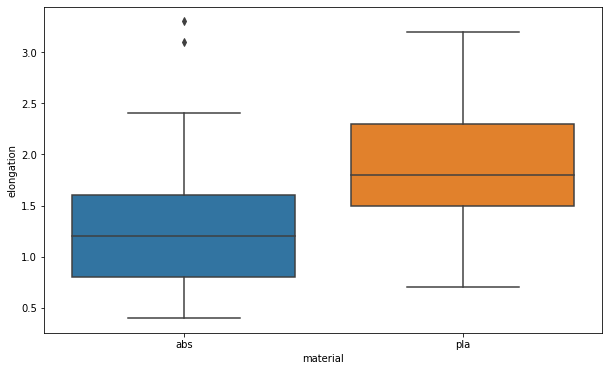

In [114]:
plt.rcParams['figure.figsize'] = (10, 6)
ax = sns.boxplot(x = 'material', y = 'elongation', data = df2)

<h4><b>Findings</b></h4>

- pla material have more elongation as compair to abs material.

(0.0, 3.445)

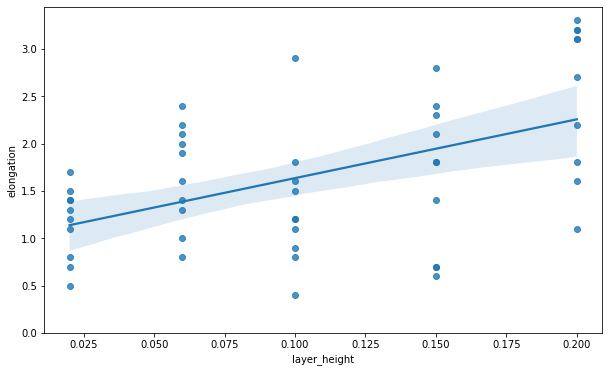

In [117]:
sns.regplot(x='layer_height', y = 'elongation', data = df2)
plt.ylim(0,)

In [118]:
df2[['layer_height','elongation']].corr()

,layer_height,elongation
layer_height,1.000000,0.507583
elongation,0.507583,1.000000


(0.0, 3.445)

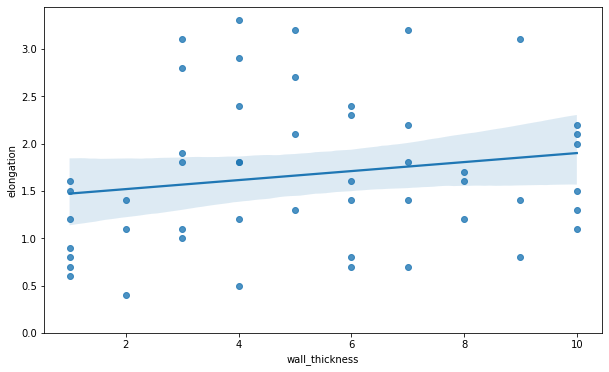

In [119]:
sns.regplot(x='wall_thickness', y = 'elongation', data = df2)
plt.ylim(0,)

In [120]:
df2[['wall_thickness','elongation']].corr()

,wall_thickness,elongation
wall_thickness,1.000000,0.176364
elongation,0.176364,1.000000


(0.0, 3.445)

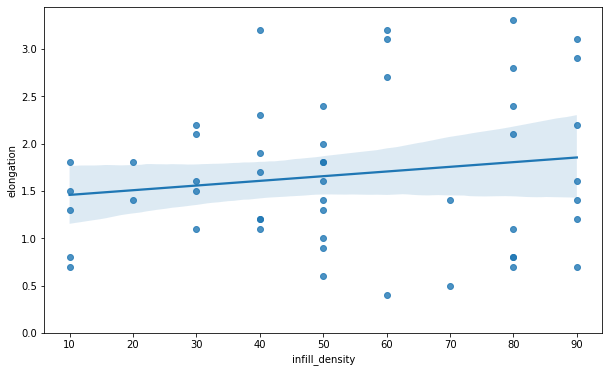

In [121]:
sns.regplot(x='infill_density', y = 'elongation', data = df2)
plt.ylim(0,)

In [122]:
df2[['infill_density','elongation']].corr()

,infill_density,elongation
infill_density,1.000000,0.159009
elongation,0.159009,1.000000


(0.0, 3.445)

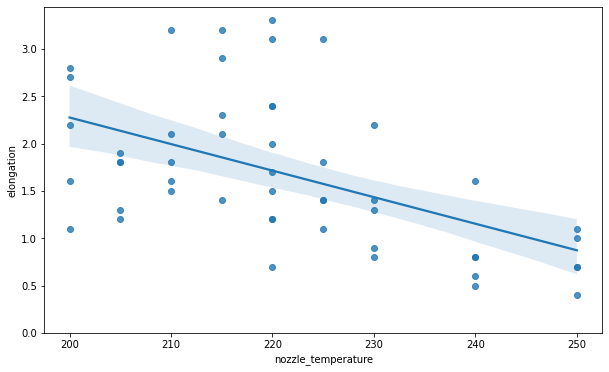

In [123]:
sns.regplot(x='nozzle_temperature', y = 'elongation', data = df2)
plt.ylim(0,)

In [124]:
df2[['nozzle_temperature','elongation']].corr()

,nozzle_temperature,elongation
nozzle_temperature,1.000000,-0.527447
elongation,-0.527447,1.000000


(0.0, 3.445)

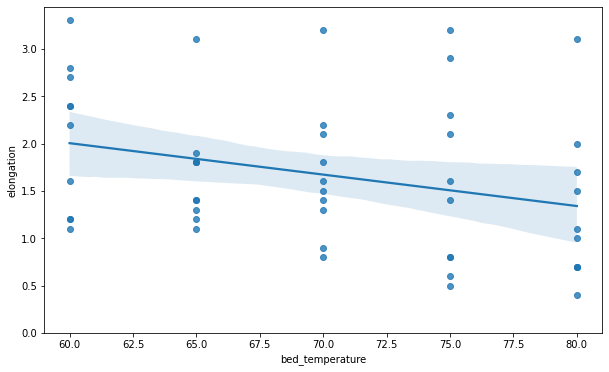

In [125]:
sns.regplot(x='bed_temperature', y = 'elongation', data = df2)
plt.ylim(0,)

In [126]:
df2[['bed_temperature','elongation']].corr()

,bed_temperature,elongation
bed_temperature,1.000000,-0.300871
elongation,-0.300871,1.000000


(0.0, 3.445)

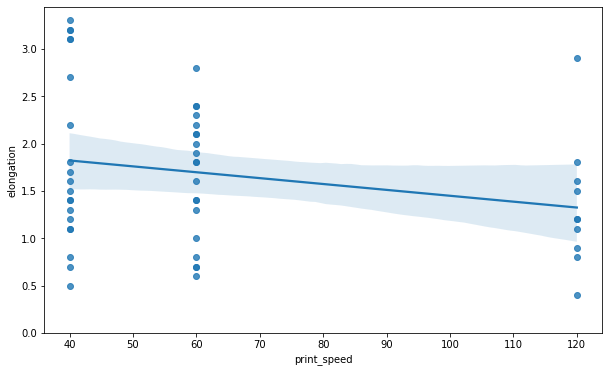

In [127]:
sns.regplot(x='print_speed', y = 'elongation', data = df2)
plt.ylim(0,)

In [128]:
df2[['print_speed','elongation']].corr()

,print_speed,elongation
print_speed,1.000000,-0.234052
elongation,-0.234052,1.000000


(0.0, 3.445)

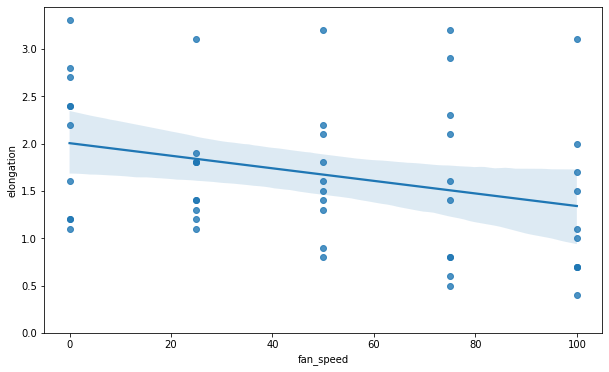

In [129]:
sns.regplot(x='fan_speed', y = 'elongation', data = df2)
plt.ylim(0,)

In [130]:
df2[['fan_speed','elongation']].corr()

,fan_speed,elongation
fan_speed,1.000000,-0.300871
elongation,-0.300871,1.000000


<h4 align='justify'><b>Convert Object into integer</b></h4>

In [131]:
df2['infill_pattern'].replace(['grid', 'honeycomb'], [0, 1], inplace = True)
df2['material'].replace(['abs', 'pla'], [0, 1], inplace = True)

(0.0, 3.445)

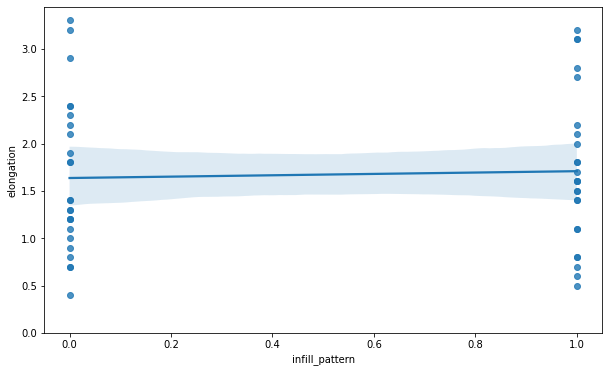

In [132]:
sns.regplot(x='infill_pattern', y = 'elongation', data = df2)
plt.ylim(0,)

In [133]:
df2[['infill_pattern','elongation']].corr()

,infill_pattern,elongation
infill_pattern,1.000000,0.046138
elongation,0.046138,1.000000


(0.0, 3.445)

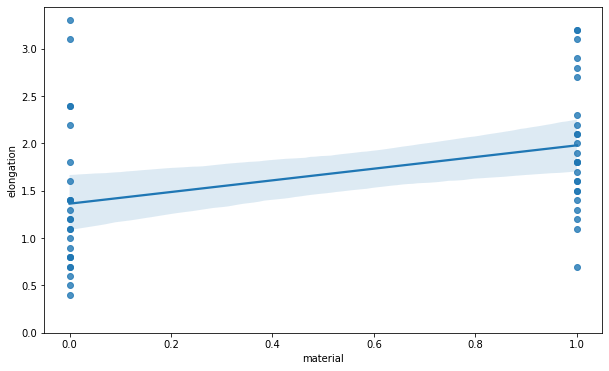

In [134]:
sns.regplot(x='material', y = 'elongation', data = df2)
plt.ylim(0,)

In [135]:
df2[['material','elongation']].corr()

,material,elongation
material,1.000000,0.394737
elongation,0.394737,1.000000


<h4><b>Creating Heatmap</b></h4>

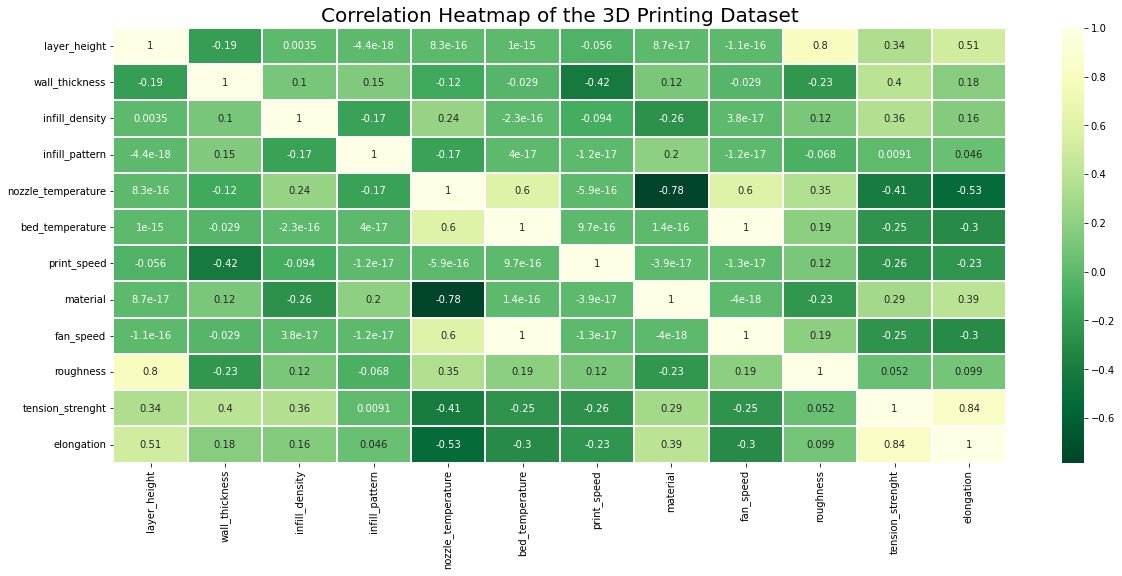

In [137]:
# first create a space for the heatmap and then draw the heatmap inside the space
fig, ax = plt.subplots(figsize = (20, 8))
# title for the heatmap
title = "Correlation Heatmap of the 3D Printing Dataset"
plt.title(title, fontsize = 20)
ttl = ax.title

# Correlation heatmap using .heatmap() function of sns library
sns.heatmap(df2.corr(), cbar = True, cmap = 'YlGn_r', annot = True, linewidths = 1, ax = ax)
plt.show()

<h4 align='justify'><b>Predicting Elognation Based on 9 Features</b></h4>

In [145]:
X2 = df2.drop(['roughness', 'elongation', 'tension_strenght'], axis = 1)
y2 = df2['elongation']

In [146]:
X2.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [147]:
y2.head()

0    1.2
1    1.4
2    0.8
3    0.5
4    0.7
Name: elongation, dtype: float64

In [149]:
# importing statsmodels library
import statsmodels.api as sm
 # let's define a function for the multiple regression

def linear_Regression2(x, y):

   x = sm.add_constant(x)

   # defining the model, fitting model, and printing result
   multiple_model2 = sm.OLS(y, x).fit()
   print(multiple_model2.summary())

In [150]:
# call the function
linear_Regression2(X2, y2)

                            OLS Regression Results                            
Dep. Variable:             elongation   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     12.88
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           4.76e-09
Time:                        09:26:21   Log-Likelihood:                -27.126
No. Observations:                  50   AIC:                             72.25
Df Residuals:                      41   BIC:                             89.46
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0071      0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [151]:
X2 = X2.drop(['infill_pattern', 'print_speed'], axis = 1)
X2.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,material,fan_speed
0,0.02,8,90,220,60,0,0
1,0.02,7,90,225,65,0,25
2,0.02,1,80,230,70,0,50
3,0.02,4,70,240,75,0,75
4,0.02,6,90,250,80,0,100


In [152]:
linear_Regression2(X2, y2)

                            OLS Regression Results                            
Dep. Variable:             elongation   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     16.76
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           7.46e-10
Time:                        09:29:05   Log-Likelihood:                -28.403
No. Observations:                  50   AIC:                             70.81
Df Residuals:                      43   BIC:                             84.19
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0069      0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
